In [45]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [46]:
print(os.getcwd())

c:\Users\Dell\Desktop\python project\project


In [47]:
df_drug=pd.read_csv("../drug200.csv")

In [48]:
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [49]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


Numerical Variables

In [50]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Ctegorical Variables

In [51]:
df_drug.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [52]:
df_drug.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [53]:
df_drug.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [54]:
df_drug.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Sex column into binary

In [55]:
column= ['Sex_Male']
df_drug= pd.get_dummies(df_drug, columns=['Sex'], drop_first=True)
df_drug

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,HIGH,HIGH,25.355,DrugY,False
1,47,LOW,HIGH,13.093,drugC,True
2,47,LOW,HIGH,10.114,drugC,True
3,28,NORMAL,HIGH,7.798,drugX,False
4,61,LOW,HIGH,18.043,DrugY,False
...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,False
196,16,LOW,HIGH,12.006,drugC,True
197,52,NORMAL,HIGH,9.894,drugX,True
198,23,NORMAL,NORMAL,14.020,drugX,True


In [56]:
df_drug['Sex_M'] = df_drug['Sex_M'].astype(int)
df_drug

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,HIGH,HIGH,25.355,DrugY,0
1,47,LOW,HIGH,13.093,drugC,1
2,47,LOW,HIGH,10.114,drugC,1
3,28,NORMAL,HIGH,7.798,drugX,0
4,61,LOW,HIGH,18.043,DrugY,0
...,...,...,...,...,...,...
195,56,LOW,HIGH,11.567,drugC,0
196,16,LOW,HIGH,12.006,drugC,1
197,52,NORMAL,HIGH,9.894,drugX,1
198,23,NORMAL,NORMAL,14.020,drugX,1


In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df_drug['BP'])

array([0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2,
       2, 1])

In [58]:
df_drug['BP']=label_encoder.fit_transform(df_drug['BP'])
df_drug

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,0,HIGH,25.355,DrugY,0
1,47,1,HIGH,13.093,drugC,1
2,47,1,HIGH,10.114,drugC,1
3,28,2,HIGH,7.798,drugX,0
4,61,1,HIGH,18.043,DrugY,0
...,...,...,...,...,...,...
195,56,1,HIGH,11.567,drugC,0
196,16,1,HIGH,12.006,drugC,1
197,52,2,HIGH,9.894,drugX,1
198,23,2,NORMAL,14.020,drugX,1


In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df_drug['Cholesterol'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1])

In [60]:
df_drug['Cholesterol']=label_encoder.fit_transform(df_drug['Cholesterol'])
df_drug

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,0,0,25.355,DrugY,0
1,47,1,0,13.093,drugC,1
2,47,1,0,10.114,drugC,1
3,28,2,0,7.798,drugX,0
4,61,1,0,18.043,DrugY,0
...,...,...,...,...,...,...
195,56,1,0,11.567,drugC,0
196,16,1,0,12.006,drugC,1
197,52,2,0,9.894,drugX,1
198,23,2,1,14.020,drugX,1


In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df_drug['Drug'])

array([0, 3, 3, 4, 0, 4, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 1, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 4, 2, 4, 0, 4, 4, 1, 4, 4, 4, 0, 2, 0, 4,
       4, 4, 1, 3, 0, 0, 0, 4, 0, 0, 2, 3, 2, 0, 4, 0, 0, 1, 0, 4, 2, 0,
       1, 4, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 1, 4, 2, 4, 3, 1, 3, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 3, 4, 0, 4, 4, 0, 2, 0,
       1, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0,
       4, 0, 0, 4, 2, 1, 2, 4, 1, 0, 2, 0, 1, 4, 4, 1, 4, 3, 1, 2, 4, 4,
       0, 3, 1, 0, 3, 4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 1, 4, 4, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 3, 3, 4,
       4, 4])

In [62]:
df_drug['Drug']=label_encoder.fit_transform(df_drug['Drug'])
df_drug

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_M
0,23,0,0,25.355,0,0
1,47,1,0,13.093,3,1
2,47,1,0,10.114,3,1
3,28,2,0,7.798,4,0
4,61,1,0,18.043,0,0
...,...,...,...,...,...,...
195,56,1,0,11.567,3,0
196,16,1,0,12.006,3,1
197,52,2,0,9.894,4,1
198,23,2,1,14.020,4,1


For Null

In [63]:
df_drug.isnull().sum()

Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
Sex_M          0
dtype: int64

In [64]:
df_drug.drop(df_drug.columns[0], axis=1, inplace=True)

In [65]:
df_drug.shape

(200, 5)

In [66]:
df_drug.duplicated().sum()

np.int64(0)

In [67]:
df_drug['BP'].unique()

array([0, 1, 2])

Data Correlation

In [68]:
df_drug.corr()

,BP,Cholesterol,Na_to_K,Drug,Sex_M
BP,1.000000,-0.137552,-0.149312,0.419397,-0.007814
Cholesterol,-0.137552,1.000000,0.010000,0.048415,-0.008811
Na_to_K,-0.149312,0.010000,1.000000,-0.689051,-0.125008
Drug,0.419397,0.048415,-0.689051,1.000000,0.018239
Sex_M,-0.007814,-0.008811,-0.125008,0.018239,1.000000


<Axes: >

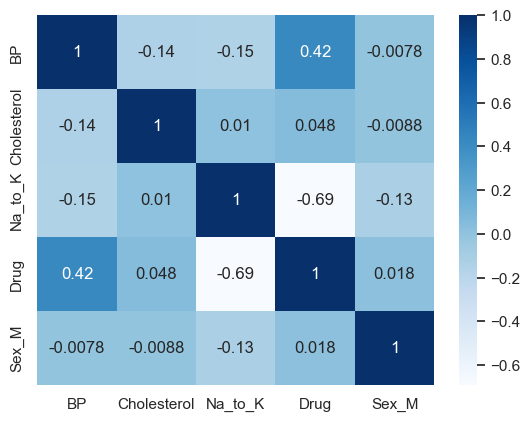

In [69]:
sns.heatmap(df_drug.corr(),annot=True,cmap="Blues")

In [70]:
skewNatoK=df_drug.Na_to_K.skew(axis=0, skipna=True)
print('Na to K skewness:',skewNatoK)

Na to K skewness: 1.039341186028881


Drug type distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_14100\4241402919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df_drug,palette="flare")


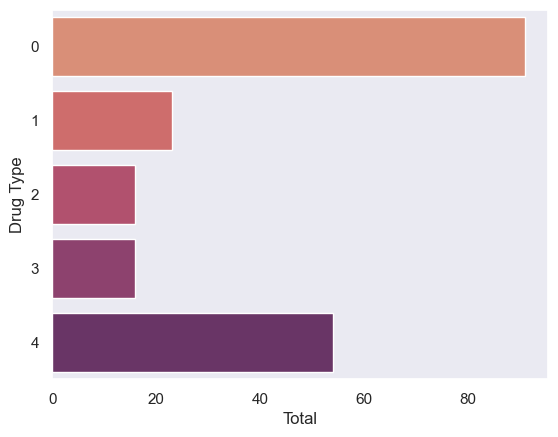

In [71]:
sns.set_theme(style="dark")
sns.countplot(y="Drug", data=df_drug,palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Gender Distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_14100\3975153631.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex_M", data=df_drug,palette="rocket")


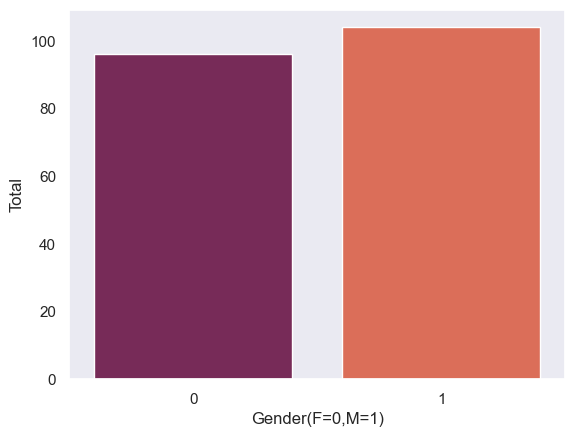

In [72]:
sns.set_theme(style="dark")
sns.countplot(x="Sex_M", data=df_drug,palette="rocket")
plt.xlabel('Gender(F=0,M=1)')
plt.ylabel('Total')
plt.show()

Blood Pressure Distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_14100\539502543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df_drug, palette="crest")


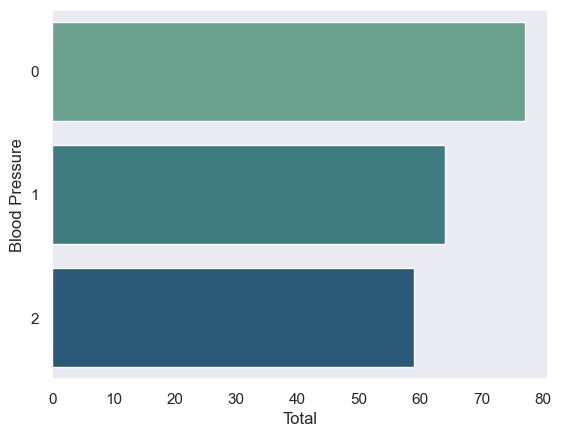

In [73]:
sns.set_theme(style="dark")
sns.countplot(y="BP", data=df_drug, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

Cholesterol distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_14100\1854604688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cholesterol", data=df_drug,palette="magma")


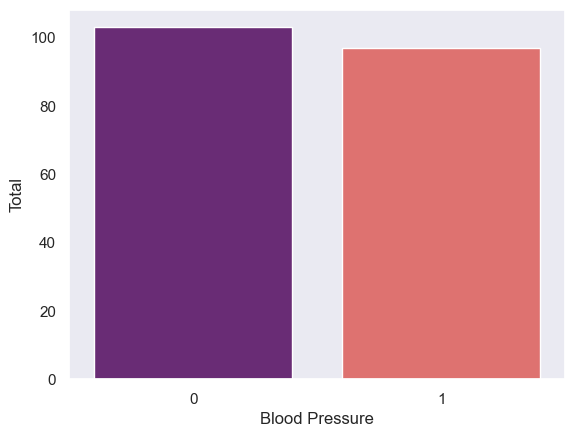

In [74]:
sns.set_theme(style="dark")
sns.countplot(x="Cholesterol", data=df_drug,palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

Gender Distribution based on Drug Type

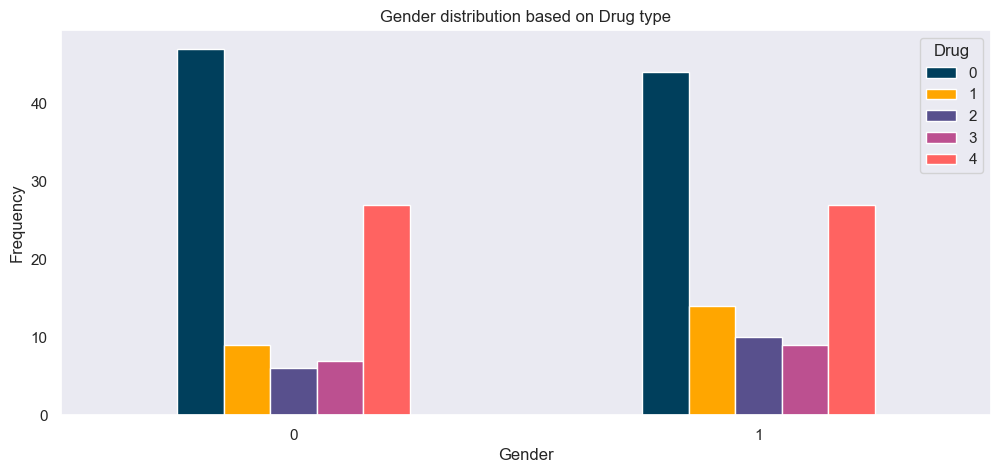

In [75]:
pd.crosstab(df_drug.Sex_M,df_drug.Drug).plot(kind="bar", figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Blood Pressure Distribution based on Cholesetrol

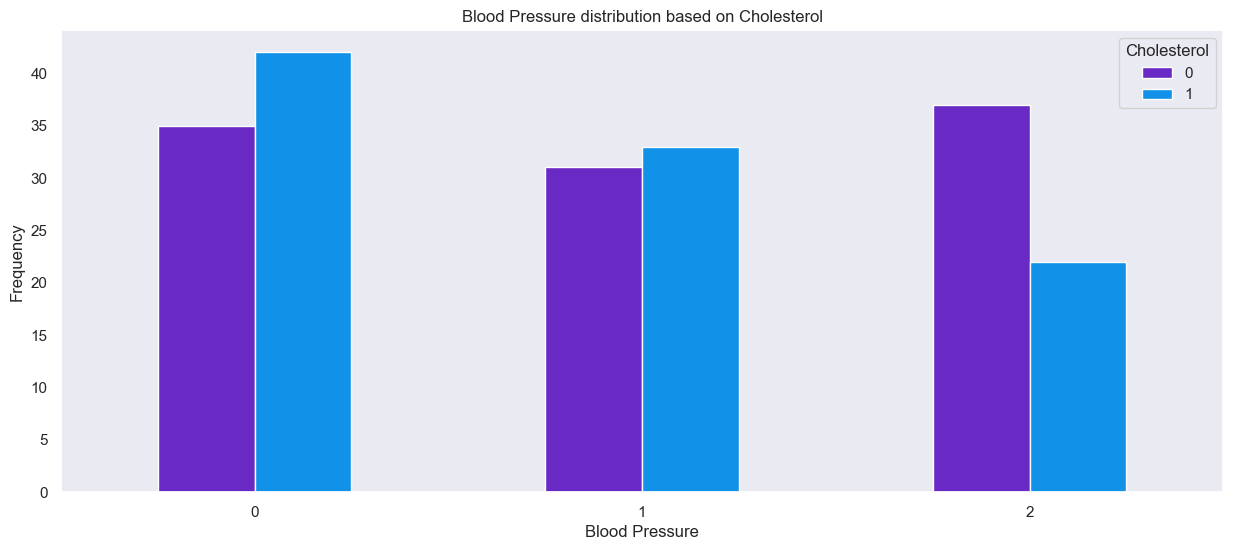

In [76]:
pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Splitting dataset

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [78]:
X=df_drug.drop(["Drug"],axis=1)
y=df_drug["Drug"]
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

Feature Engineering

In [79]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [80]:
X_train.head()

,BP,Cholesterol,Na_to_K,Sex_M
131,1,1,32.922,1
96,1,0,38.247,0
181,2,0,13.884,0
19,0,1,25.974,0
153,1,1,14.642,0


In [81]:
X_test.head()

,BP,Cholesterol,Na_to_K,Sex_M
18,1,0,7.298,1
170,2,0,12.879,0
107,1,0,20.013,1
98,0,1,35.639,1
177,2,0,19.011,1


Models

Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.80      0.89      0.84        18

    accuracy                           0.82        60
   macro avg       0.49      0.53      0.51        60
weighted avg       0.72      0.82      0.77        60

[[29  0  0  0  1]
 [ 1  4  0  0  0]
 [ 2  1  0  0  0]
 [ 1  0  0  0  3]
 [ 2  0  0  0 16]]
Logistic Regression accuracy is: 81.67%


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

<Axes: >

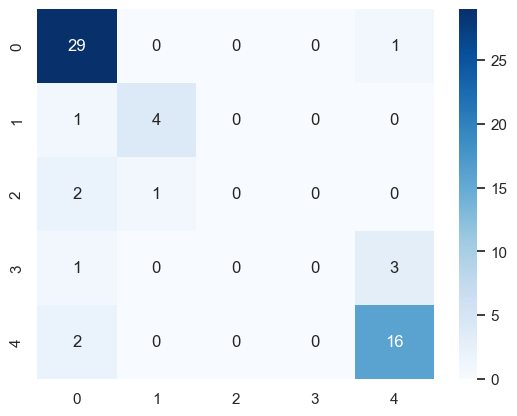

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="Blues",annot=True)

Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier=DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train,y_train)
y_pred=DTclassifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
Dtacc=accuracy_score(y_pred,y_test)
print('Decison Tree Accuracy is:{:.2f}%'.format(Dtacc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.67      0.40      0.50         5
           2       0.40      0.67      0.50         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.81      0.81      0.80        60
weighted avg       0.94      0.93      0.93        60

[[30  0  0  0  0]
 [ 0  2  3  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decison Tree Accuracy is:93.33%


<Axes: >

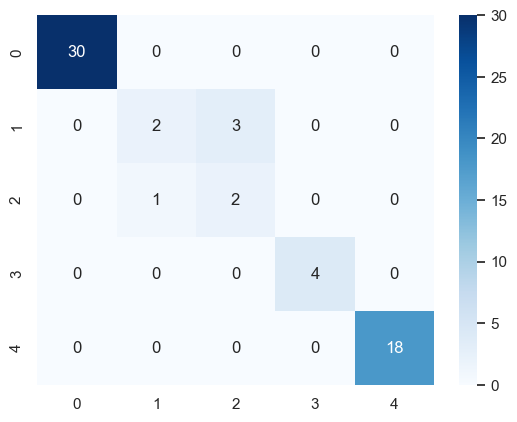

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="Blues",annot=True)

Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.67      0.40      0.50         5
           2       0.40      0.67      0.50         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        18

    accuracy                           0.93        60
   macro avg       0.81      0.81      0.80        60
weighted avg       0.94      0.93      0.93        60

[[30  0  0  0  0]
 [ 0  2  3  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 93.33%


<Axes: >

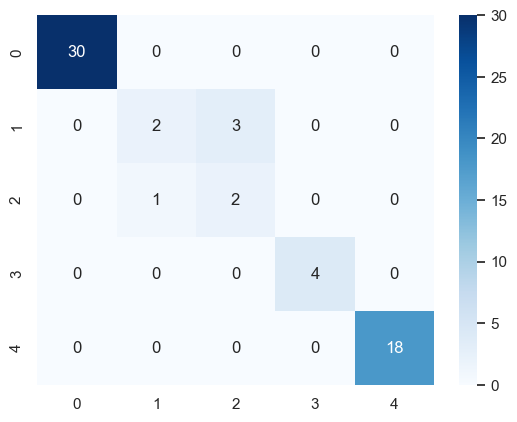

In [87]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="Blues",annot=True)

Model Comparison

In [88]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, Dtacc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,93.333333
2,Random Forest,93.333333
0,Logistic Regression,81.666667
